# Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/airline_passengers.csv", parse_dates=["Month"], index_col="Month")
df.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# EDA

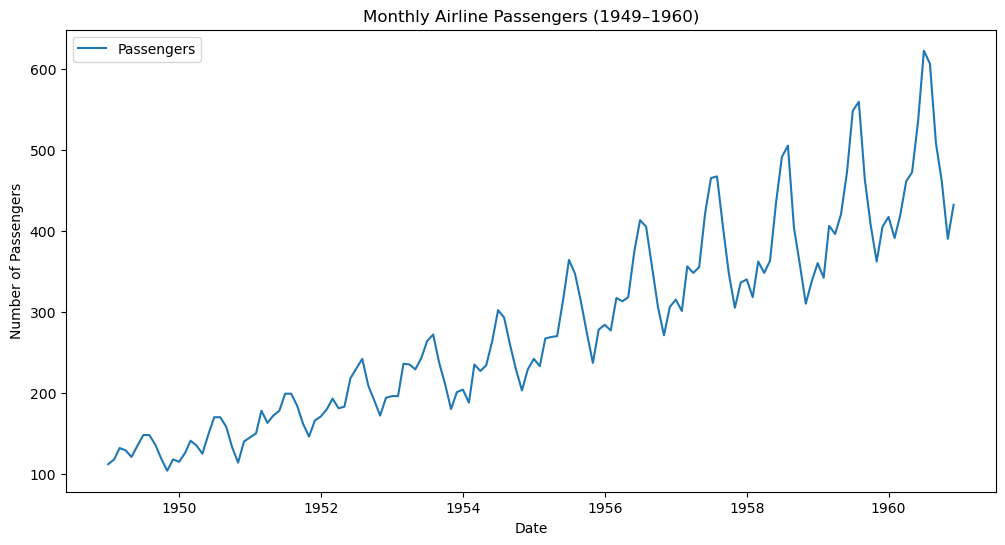

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["#Passengers"], label="Passengers")
plt.title("Monthly Airline Passengers (1949–1960)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


In [15]:
# Summary statistics
print(df.describe())


       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


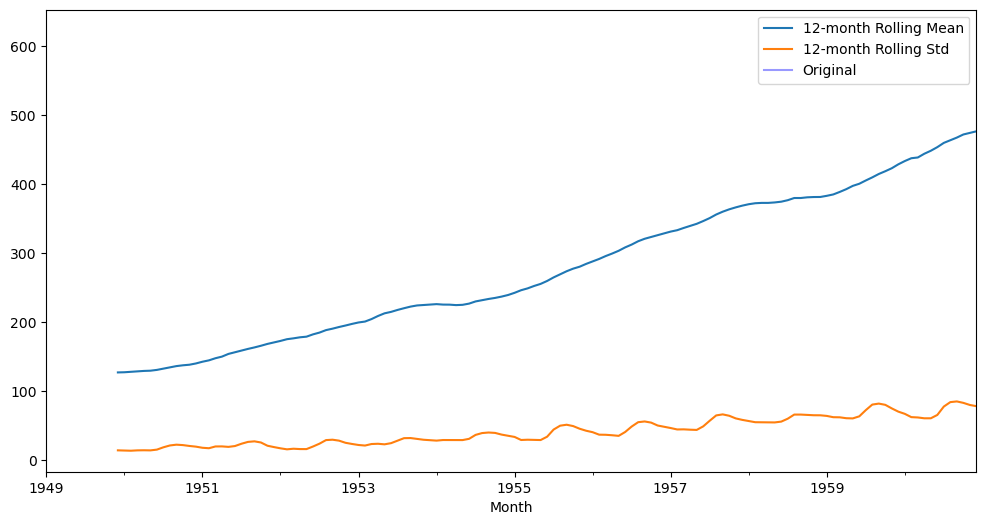

In [17]:
#Rolling statistics (trend & volatility)
df["#Passengers"].rolling(12).mean().plot(label="12-month Rolling Mean", figsize=(12,6))
df["#Passengers"].rolling(12).std().plot(label="12-month Rolling Std")
plt.plot(df["#Passengers"], color="blue", alpha=0.4, label="Original")
plt.legend()
plt.show()


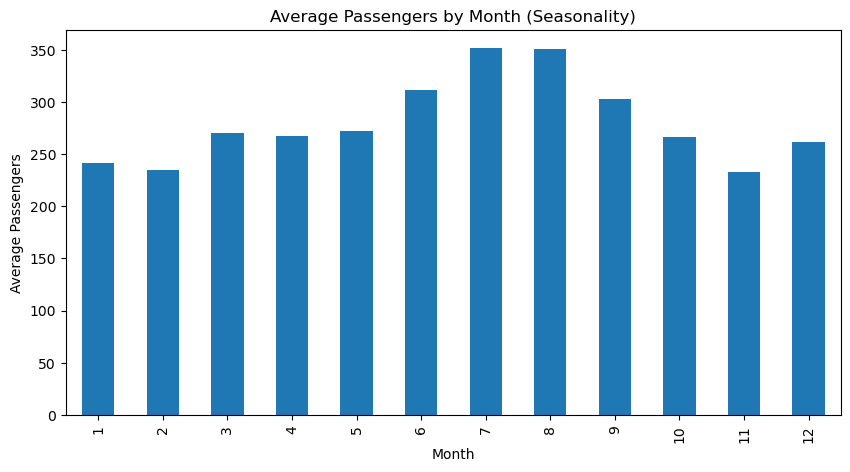

In [18]:
#Seasonality patterns (month-wise averages)
df["month"] = df.index.month
monthly_avg = df.groupby("month")["#Passengers"].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(kind="bar")
plt.title("Average Passengers by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Passengers")
plt.show()


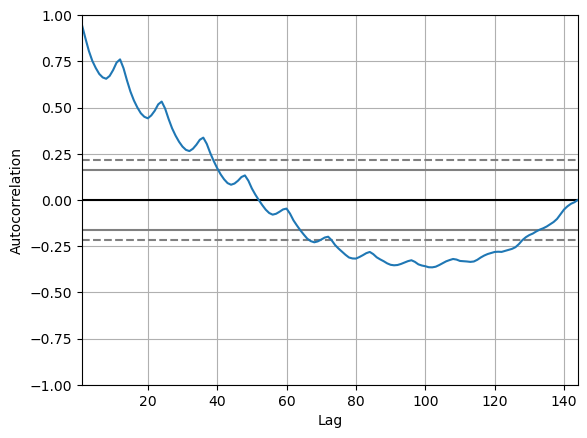

In [20]:
#Autocorrelation check (quick peek)
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df["#Passengers"])
plt.show()


# Decomposition

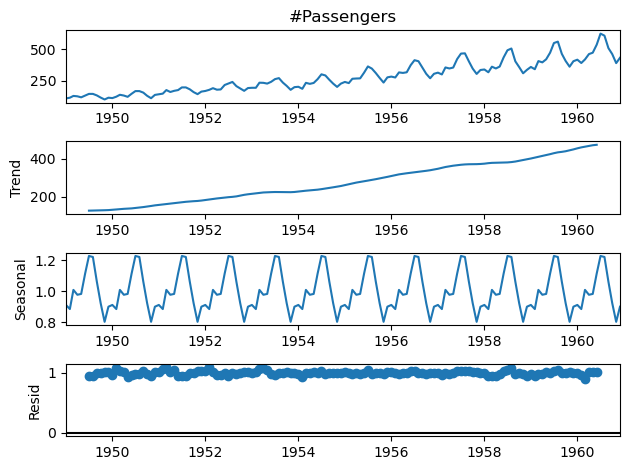

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["#Passengers"], model="multiplicative", period=12)
result.plot()
plt.show()


# Train–Test Split

In [7]:
train = df.iloc[:-12]
test = df.iloc[-12:]


# Naive Forecast

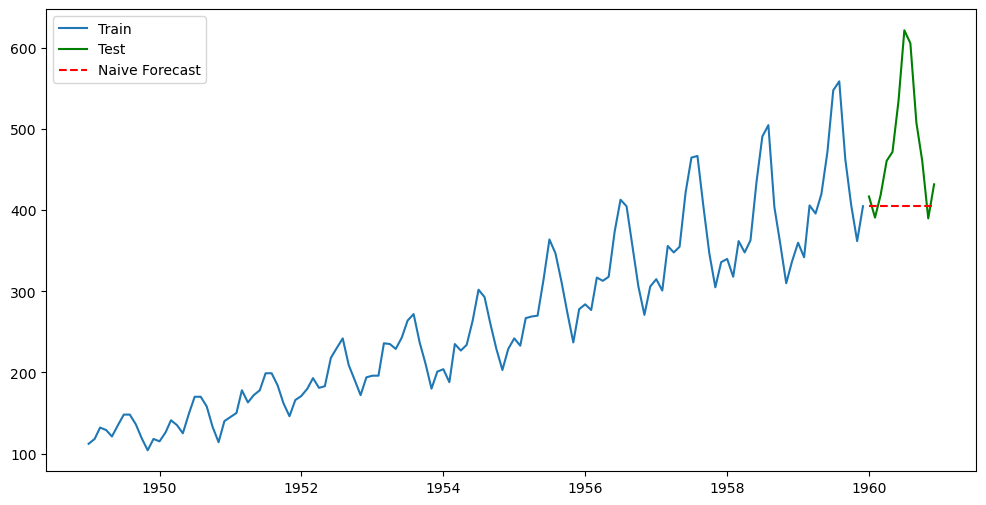

In [8]:
naive_forecast = [train["#Passengers"].iloc[-1]] * len(test)

plt.figure(figsize=(12,6))
plt.plot(train.index, train["#Passengers"], label="Train")
plt.plot(test.index, test["#Passengers"], label="Test", color="green")
plt.plot(test.index, naive_forecast, label="Naive Forecast", color="red", linestyle="--")
plt.legend()
plt.show()


# Seasonal Naive Forecast

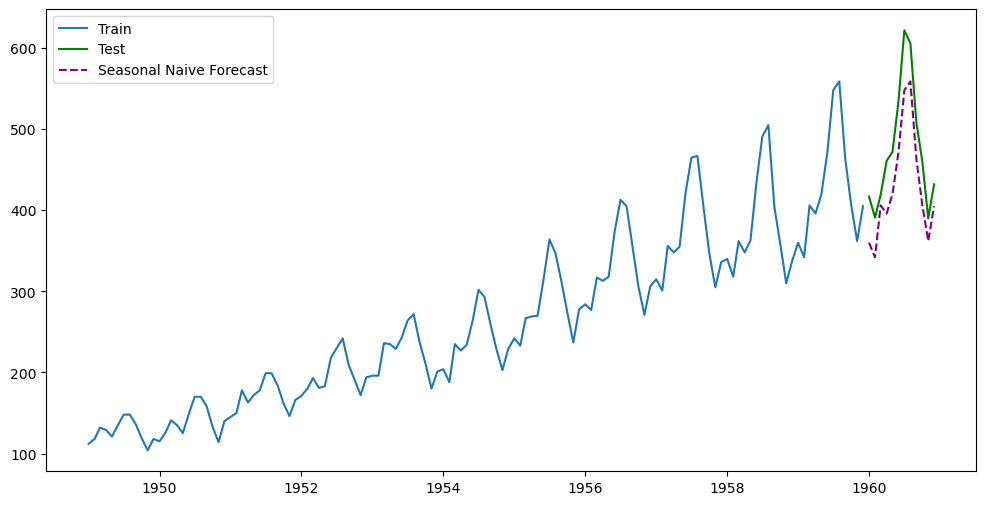

In [10]:
seasonal_naive_forecast = train["#Passengers"].iloc[-12:].values

plt.figure(figsize=(12,6))
plt.plot(train.index, train["#Passengers"], label="Train")
plt.plot(test.index, test["#Passengers"], label="Test", color="green")
plt.plot(test.index, seasonal_naive_forecast, label="Seasonal Naive Forecast", color="purple", linestyle="--")
plt.legend()
plt.show()


# ARIMA Model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.71 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.29 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.24 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.42 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.09 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.32 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

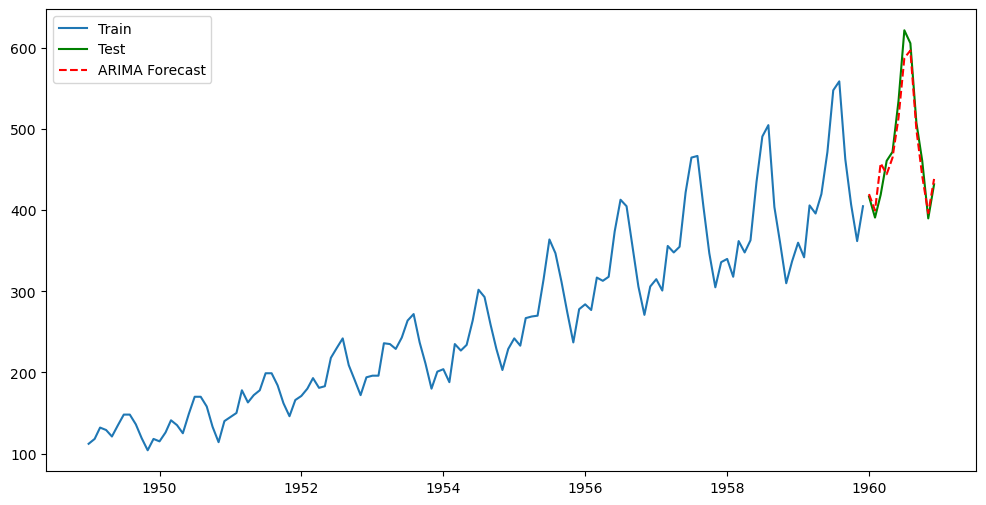

In [13]:
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Fit ARIMA
model = pm.auto_arima(train["#Passengers"], seasonal=True, m=12, trace=True, error_action="ignore", suppress_warnings=True)
forecast = model.predict(n_periods=len(test))
forecast = pd.Series(forecast, index=test.index)

plt.figure(figsize=(12,6))
plt.plot(train.index, train["#Passengers"], label="Train")
plt.plot(test.index, test["#Passengers"], label="Test", color="green")
plt.plot(test.index, forecast, label="ARIMA Forecast", color="red", linestyle="--")
plt.legend()
plt.show()



# Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Naive
mae_naive = mean_absolute_error(test["#Passengers"], naive_forecast)
rmse_naive = np.sqrt(mean_squared_error(test["#Passengers"], naive_forecast))

# Seasonal Naive
mae_seasonal = mean_absolute_error(test["#Passengers"], seasonal_naive_forecast)
rmse_seasonal = np.sqrt(mean_squared_error(test["#Passengers"], seasonal_naive_forecast))

#ARIMA
mae_arima = mean_absolute_error(test["#Passengers"], forecast)
rmse_arima = np.sqrt(mean_squared_error(test["#Passengers"], forecast))

print("Naive Forecast    - MAE:", mae_naive, "RMSE:", rmse_naive)
print("Seasonal Naive    - MAE:", mae_seasonal, "RMSE:", rmse_seasonal)
print("ARIMA Forecast    - MAE:", mae_arima, "RMSE:", rmse_arima)




Naive Forecast    - MAE: 76.0 RMSE: 102.97653454387881
Seasonal Naive    - MAE: 47.833333333333336 RMSE: 50.708316214732804
ARIMA Forecast    - MAE: 14.89820852362009 RMSE: 18.536468993328366
